In [23]:
import pandas as pd
import re, os
from pprint import pprint
from wordcloud import WordCloud
import pickle

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

import pyLDAvis
import pyLDAvis.gensim_models

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anmolu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
texts = []
for i in range(100):
	in_file = open('./lda_inputs/file_' + str(i) + '.txt', 'r')
	texts.append(in_file.read())
	in_file.close()

all_sites = pd.DataFrame(texts)
all_sites.columns = ['site_text']
all_sites['text_processed'] = all_sites['site_text'].map(lambda x : re.sub('[,\.!?]', '', x).lower())

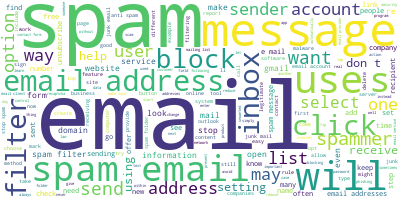

In [6]:
long_string = ','.join(all_sites['text_processed'].values)

wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [7]:
stop_words = stopwords.words('english')

def sent_to_words(sentences):
	for sentence in sentences:
		yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
	return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = all_sites.text_processed.values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['jaden', 'geller', 'giving', 'gmail', 'inbox', 'year', 'old', 'security', 'engineer', 'san', 'francisco', 'battling', 'explosion', 'spam', 'free', 'email', 'account', 'months', 'like', 'mailing', 'lists', 'never', 'signed', 'obvious', 'scams', 'thinks', 'address', 'compromised', 'beyond', 'saving']


In [9]:
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2), (6, 2), (7, 4), (8, 2), (9, 1), (10, 1), (11, 2), (12, 10), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 2), (27, 1), (28, 4), (29, 1)]


In [26]:
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"spam" + 0.028*"email" + 0.012*"emails" + 0.009*"click" + '
  '0.009*"mail" + 0.009*"address" + 0.009*"message" + 0.009*"messages" + '
  '0.007*"inbox" + 0.007*"use"'),
 (1,
  '0.021*"email" + 0.017*"spam" + 0.011*"mail" + 0.008*"address" + '
  '0.008*"emails" + 0.007*"messages" + 0.006*"message" + 0.006*"account" + '
  '0.005*"hes" + 0.005*"click"'),
 (2,
  '0.023*"spam" + 0.021*"email" + 0.014*"emails" + 0.009*"address" + '
  '0.007*"mail" + 0.007*"message" + 0.006*"messages" + 0.005*"junk" + '
  '0.005*"inbox" + 0.005*"click"'),
 (3,
  '0.031*"email" + 0.023*"spam" + 0.015*"emails" + 0.013*"address" + '
  '0.010*"mail" + 0.010*"junk" + 0.007*"use" + 0.006*"messages" + '
  '0.006*"message" + 0.006*"click"'),
 (4,
  '0.036*"spam" + 0.028*"email" + 0.013*"emails" + 0.009*"mail" + '
  '0.008*"address" + 0.008*"messages" + 0.006*"click" + 0.006*"message" + '
  '0.006*"junk" + 0.005*"use"'),
 (5,
  '0.036*"spam" + 0.033*"email" + 0.022*"emails" + 0.012*"address" + '
  '0.008

In [28]:
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda_results/ldavis_prepared_' + str(num_topics))

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
	pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
	LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda_results/ldavis_prepared_' + str(num_topics) + '.html')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
